# Heart Failure Prediction 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df=pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]

## Instructions

### 1. Data Exploration (EDA)
- **Task 1**: Load the dataset using pandas and display the first few rows.
- **Task 2**: Check for missing values and clean the data if necessary.
- **Task 3**: Generate summary statistics for the numerical columns.
- **Task 4**: Visualize the distribution of the target variable (`DEATH_EVENT`).
- **Task 5**: Plot histograms or box plots for continuous variables like `age`, `creatinine_phosphokinase`, `ejection_fraction`, `serum_creatinine`, etc.

### 2. Data Visualization
- **Task 6**: Create a correlation matrix heatmap to understand the relationships between the features.
- **Task 7**: Create count plots or bar charts for categorical variables like `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`.
- **Task 8**: Create scatter plots or pair plots for continuous variables like `age` vs `ejection_fraction`, `serum_creatinine`, etc., colored by `DEATH_EVENT`.

### 3. Model Building
- **Task 9**: Split the dataset into features (`X`) and the target variable (`y = DEATH_EVENT`).
- **Task 10**: Perform train-test splitting (70% training, 30% testing) using `train_test_split` from sklearn.
- **Task 11**: Standardize the continuous features using `StandardScaler`.

### 4. Model Training and Evaluation
- **Task 12**: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.
- **Task 13**: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
- **Task 14**: Train a Decision Tree Classifier and compare its performance with other models.

### 5. Cross Validation
- **Task 15**: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
- **Task 16**: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

### 6. Model Improvement
- **Task 17**: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
- **Task 18**: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

### 7. Conclusion
- **Task 19**: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.
- **Task 20**: Suggest potential improvements or next steps for the analysis.

# EDA

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
df.describe()   #summary statistics

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


C:\Users\PC\AppData\Local\Temp\ipykernel_9472\2021753461.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data=df, x='DEATH_EVENT',color='blue',hue='sex')


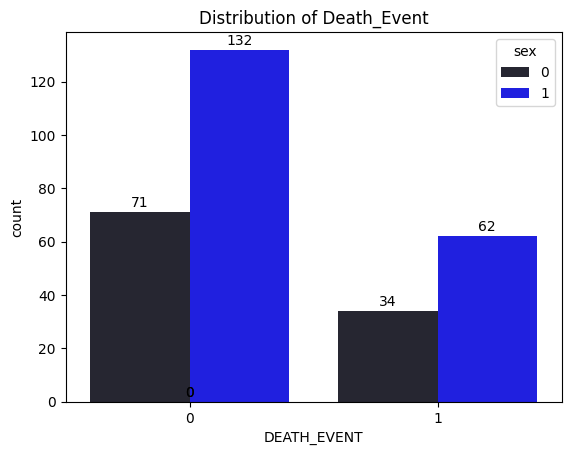

In [11]:
death_value = df['DEATH_EVENT'].value_counts()
sns.countplot(data=df, x='DEATH_EVENT',color='blue',hue='sex')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height() + 2,          
             int(p.get_height()),           
             ha='center')
plt.title('Distribution of Death_Event')
plt.show()

In [12]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

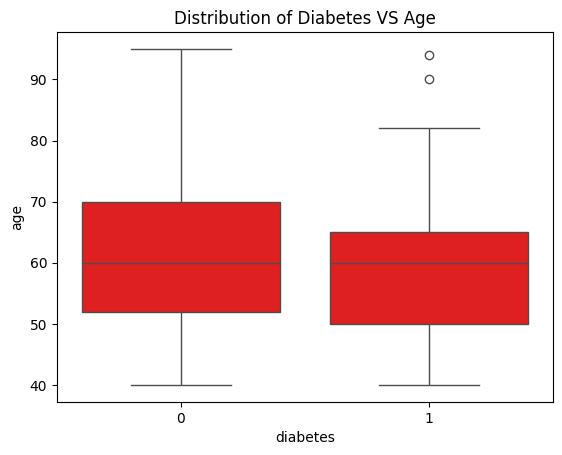

In [13]:
sns.boxplot(data=df, y='age', x='diabetes',color='red')
plt.title('Distribution of Diabetes VS Age')
plt.show()

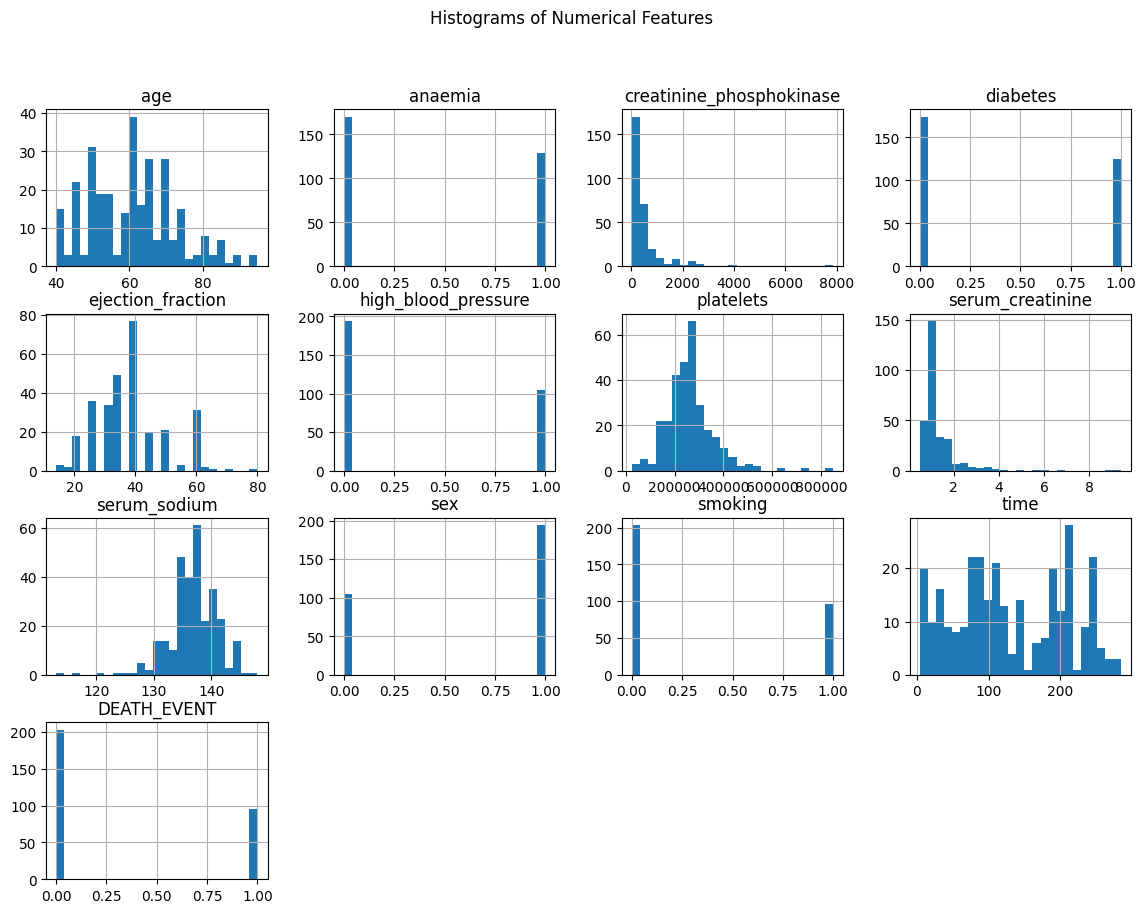

In [14]:
df.hist(bins=25, figsize=(14, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Data Visualization

In [16]:
corr_matrix = df.corr()   #Correlation Matrix
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


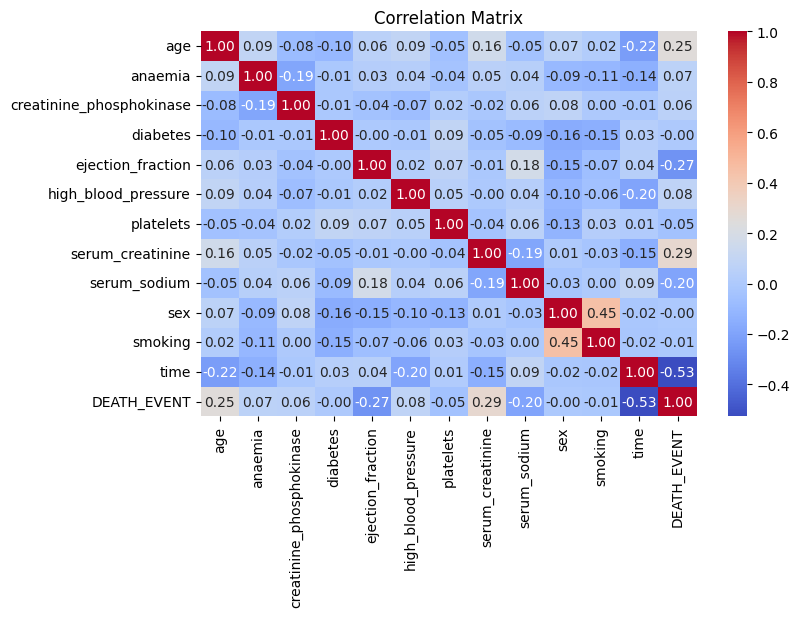

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_9472\1384080864.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data=df, x='anaemia',color='blue',hue='DEATH_EVENT')


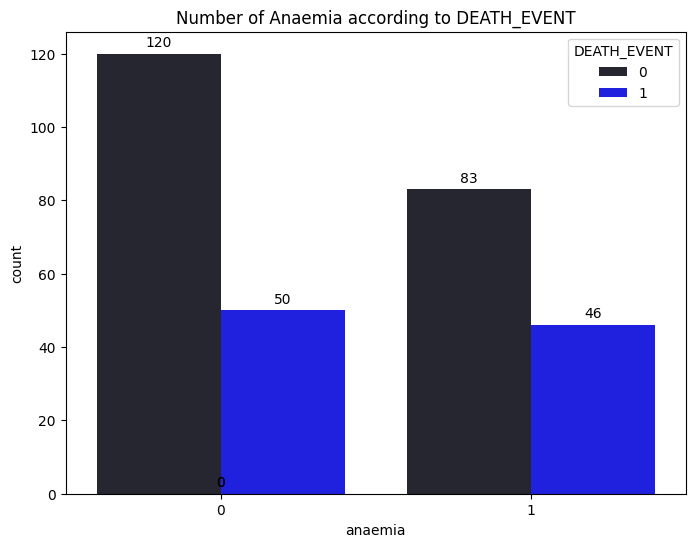

In [18]:
plt.figure(figsize=(8,6))
anaemia_value = df['anaemia'].value_counts()
sns.countplot(data=df, x='anaemia',color='blue',hue='DEATH_EVENT')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height() + 2,          
             int(p.get_height()),           
             ha='center')
plt.title('Number of Anaemia according to DEATH_EVENT')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_9472\3113856112.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=df, x='diabetes',color='red',hue='DEATH_EVENT')


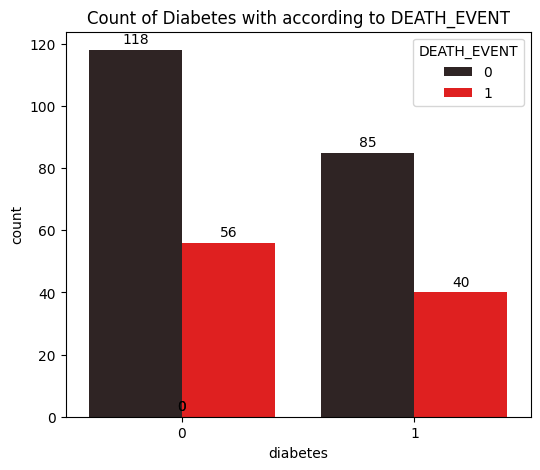

In [19]:
plt.figure(figsize=(6,5))
diabetes_value = df['diabetes'].value_counts()
sns.countplot(data=df, x='diabetes',color='red',hue='DEATH_EVENT')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height() + 2,          
             int(p.get_height()),           
             ha='center')
plt.title('Count of Diabetes with according to DEATH_EVENT')
plt.show()

In [20]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [21]:
df['high_blood_pressure'].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_9472\2845902904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=blood_press_value.index,y= blood_press_value,palette='viridis')


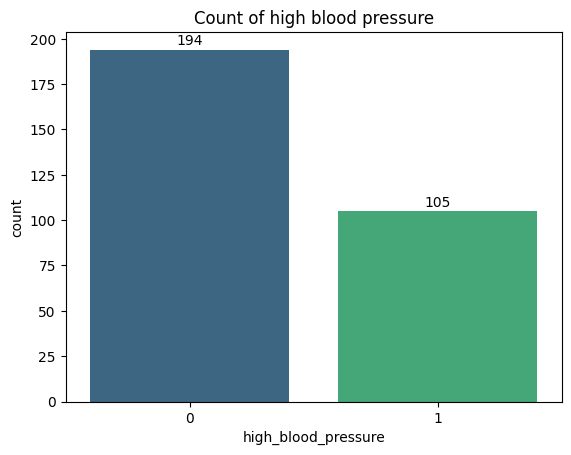

In [22]:
blood_press_value = df['high_blood_pressure'].value_counts()
sns.barplot( x=blood_press_value.index,y= blood_press_value,palette='viridis')
for i,v in enumerate(blood_press_value):
    plt.text(i,v+1,str(v),ha='center',va='bottom')
plt.title('Count of high blood pressure')
plt.show()

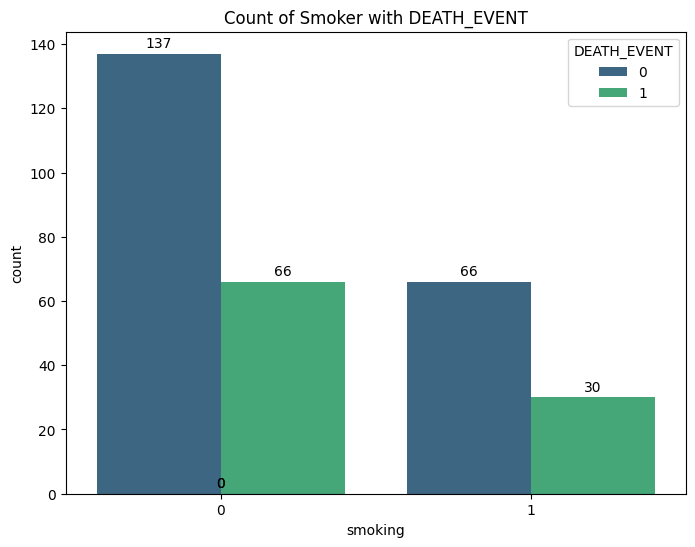

In [23]:
plt.figure(figsize=(8,6))
smoke_value = df['smoking'].value_counts()
sns.countplot( x= 'smoking', palette='viridis',hue='DEATH_EVENT',data=df)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height() + 2,          
             int(p.get_height()),           
             ha='center')
plt.title('Count of Smoker with DEATH_EVENT')
#plt.legend()
plt.show()

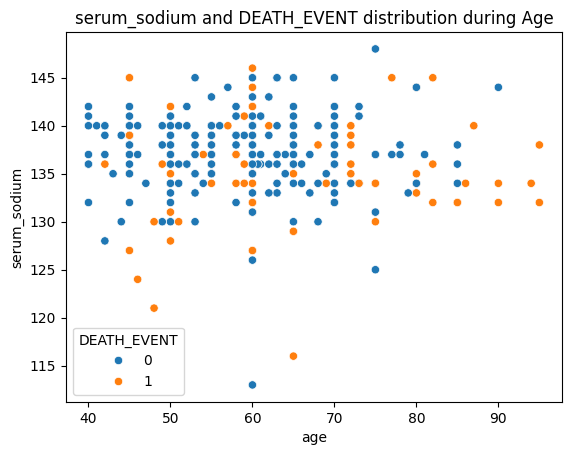

In [24]:
sns.scatterplot(data=df,x='age',y='serum_sodium',hue='DEATH_EVENT')
plt.title('serum_sodium and DEATH_EVENT distribution during Age')
plt.show()

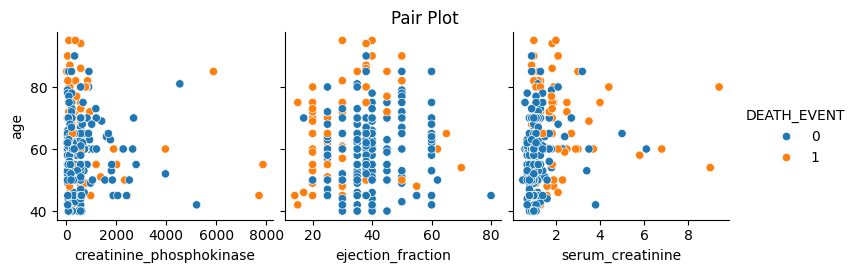

In [25]:
#making a pair plot with creatinine_phosphokinase,ejection_fraction,serum_creatinine with age and death_event
sns.pairplot(data=df, x_vars=['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine'],y_vars='age',hue='DEATH_EVENT')
plt.suptitle('Pair Plot',y=1.05)
plt.show()

# Analysis of visualized data:
- **Distribution of Death_Event :** The distribution of DEATH_EVENT have 203(68%) instance of 'No' and 96(32%) instance of 'Yes'. Where the number of male and Female are 132 and 71 in 'No'(0), respectively. But when DEATH_EVENT is 'Yes'(1) which contain 65% of people are male and only 35% percent of female. Thus, male are the mostly effected by heart attack.
- **Diabetes vs Age :** Diabetes 'YES' occured in a age group which is likely 50-65 age.
- **Correlation Analysis:** DEATH_EVENT has highly correlation with serum_creatinine(0.29), age(0.25) also having negative correlation with serum_sodium(-0.20) ejection_fraction(-0.27) and time(-0.53). Positive highly correlated features are the most likely important features.
- **Aneamia according to DEATH_EVENT:** the number of anaemia have 170(57%) instance of 'No'(0) and 129(43%) instance of 'Yes'. IN contrast, 'No' has     50(29% percent) of DEATH_EVENT whereas anaemia 'Yes' have 46 instance of 'Death_Event'. So, may be anaemia is not highly impactful feature to occured   EVENT_DEATH.
- **Diabetes vs DEATH_EVENT:** Diabetes 'No' class have a higher proportion of ‘Yes’ for DEATH_EVENT where as total number of 'No' have 174, but 'Yes' class in DEATH_EVENT appear slightly less represented in the ‘YES’ category of diabetes affected.
- **Smoking with DEATH_EVENT distribution:** Smoking 'No' and 'Yes' both have almost same yes category ratio in Death_Event which also represents low correlation value with each other.
- **Serum_sodium and DEATH_EVENT:** Most of the DEATH_EVENT occurred when serum sodium are 130-140 where age is over 70. Also serum sodium are negatively correlated with death_event.
- **ejection_fraction vs age:** Highly DEATH_EVENT occurred when ejection_fraction are under 35. So, it is a impactful feature for DEATH_EVENT.
- **Serum_creatinine and DEATH_EVENT:** Over 2 of serum_creatinine are mostly impacted to DEATH_EVENT. Whereas age is not that important with this feature. Also this feature has highest correlation(0.29) with DEATH_EVENT.So that, serum_creatinine is a most important feature for DEATH_EVENT.

# Model building

In [28]:
x = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

In [29]:
x.shape

(299, 12)

In [30]:
y.shape

(299,)

In [31]:
df_scaled = df.copy()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size =0.3, random_state = 30)

In [34]:
print(xtrain.shape)
print(ytrain.shape)

(209, 12)
(209,)


In [35]:
print(xtest.shape)
print(ytest.shape)

(90, 12)
(90,)


In [36]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [38]:
xtrain_scaled.shape

(209, 12)

# Logistics regression model and evaluation

In [40]:
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression()

In [41]:
logi_reg

LogisticRegression()

In [42]:
logi_reg.fit(xtrain_scaled,ytrain)

LogisticRegression()

In [43]:
y_pred_logi = logi_reg.predict(xtest_scaled)
y_pred_logi

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [44]:
logi_reg.score(xtest_scaled,ytest)

0.8

In [45]:
logi_reg.score(xtrain_scaled,ytrain)

0.84688995215311

In [46]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [47]:
# Evaluating logistic regression model
print("Logistic Regression report: ")
print(classification_report(ytest,y_pred_logi))

Logistic Regression report: 
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        57
           1       0.86      0.55      0.67        33

    accuracy                           0.80        90
   macro avg       0.82      0.75      0.76        90
weighted avg       0.81      0.80      0.79        90



In [48]:
#accuracy score
logi_test_accuracy = accuracy_score(ytest,y_pred_logi)
print(f'Logistic Regression testing accuracy score: {logi_test_accuracy}')

Logistic Regression testing accuracy score: 0.8


In [49]:
logi_train_accuracy = accuracy_score(ytrain,logi_reg.predict(xtrain_scaled))
print(f'Logistic Regression training accuracy score: {logi_train_accuracy}')

Logistic Regression training accuracy score: 0.84688995215311


In [50]:
# F1 score
logi_f1 = f1_score(ytest,y_pred_logi)
print(f'Logistics Regression F1 score: {logi_f1}')

Logistics Regression F1 score: 0.6666666666666666


In [51]:
#recall score
logi_recall = recall_score(ytest,y_pred_logi)
print(f'Logistics Regression Recall score: {logi_recall}')

Logistics Regression Recall score: 0.5454545454545454


In [52]:
#precision score
logi_precision = precision_score(ytest,y_pred_logi)
print(f'Logistics Regression Precision score: {logi_precision}')

Logistics Regression Precision score: 0.8571428571428571


In [53]:
#confusion matrix
con_matrix = confusion_matrix(ytest,y_pred_logi)
con_matrix

array([[54,  3],
       [15, 18]], dtype=int64)

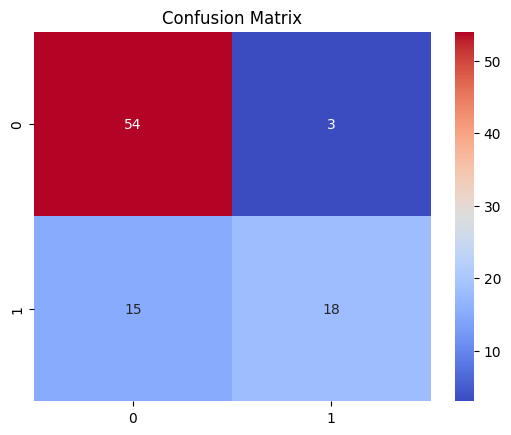

In [54]:
sns.heatmap(con_matrix,annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

# KNN Classifier Model and Evaluation

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(xtrain_scaled,ytrain)

KNeighborsClassifier(n_neighbors=31)

In [58]:
y_pred_knn = knn.predict(xtest_scaled)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [59]:
print(f'KNN Classifier testing score: {knn.score(xtest_scaled,ytest)}')  #testing score
print(f'KNN Classifier training score: {knn.score(xtrain_scaled,ytrain)}')    #training score

KNN Classifier testing score: 0.6666666666666666
KNN Classifier training score: 0.7464114832535885


In [60]:
# model evaluation
print(f'KNN classification model report: ')
print(classification_report(ytest,y_pred_knn))

KNN classification model report: 
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        57
           1       1.00      0.09      0.17        33

    accuracy                           0.67        90
   macro avg       0.83      0.55      0.48        90
weighted avg       0.78      0.67      0.56        90



In [61]:
knn_accuracy = accuracy_score(ytest,y_pred_knn)
print(f'KNN testing accuracy acore: {knn_accuracy}')

KNN testing accuracy acore: 0.6666666666666666


In [62]:
knn_accuracy1 = accuracy_score(ytrain,knn.predict(xtrain_scaled))
print(f'KNN testing accuracy score: {knn_accuracy1}')

KNN testing accuracy score: 0.7464114832535885


In [63]:
knn_f1 = f1_score(ytest,y_pred_knn)
print(f'KNN testing f1 score: {knn_f1}')

KNN testing f1 score: 0.16666666666666666


In [64]:
knn_recall = recall_score(ytest,y_pred_knn)
print(f'KNN testing recall score: {knn_recall}')

KNN testing recall score: 0.09090909090909091


In [65]:
knn_precision = precision_score(ytest,y_pred_knn)
print(f'KNN testing precision score: {knn_precision}')

KNN testing precision score: 1.0


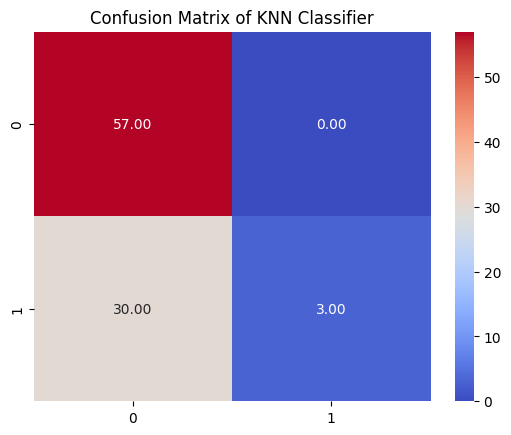

In [66]:
conf_matrix = confusion_matrix(ytest,y_pred_knn)
sns.heatmap(conf_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Confusion Matrix of KNN Classifier')
plt.show()

# Decision Tree Classifier model and evaluation

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [70]:
dtc.fit(xtrain_scaled,ytrain)

DecisionTreeClassifier()

In [71]:
y_pred_tree = dtc.predict(xtest_scaled)
y_pred_tree

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [72]:
print(f'Decision Tree Classifier training score: {dtc.score(xtrain_scaled,ytrain)}') #training score
print(f'Decision Tree Classifier testing score: {dtc.score(xtest_scaled,ytest)}')  #testing score

Decision Tree Classifier training score: 1.0
Decision Tree Classifier testing score: 0.7


In [73]:
#accuracy score
dtc_accuracy = accuracy_score(ytest,y_pred_tree)
print(f'Decision Tree Classifier accuracy score: {dtc_accuracy}')

Decision Tree Classifier accuracy score: 0.7


In [74]:
#f1 score
f1_dtc = f1_score(ytest,y_pred_tree)
print(f'Decision Tree Classifier F1 score: {f1_dtc}')

Decision Tree Classifier F1 score: 0.5970149253731343


In [75]:
#recall score
recall_dtc = recall_score(ytest,y_pred_tree)
print(f'Decision Tree Classifier recall score: {recall_dtc}')

Decision Tree Classifier recall score: 0.6060606060606061


In [76]:
#precision score
precision_dtc = precision_score(ytest,y_pred_tree)
print(f'Decision Tree Classifier precision score: {precision_dtc}')

Decision Tree Classifier precision score: 0.5882352941176471


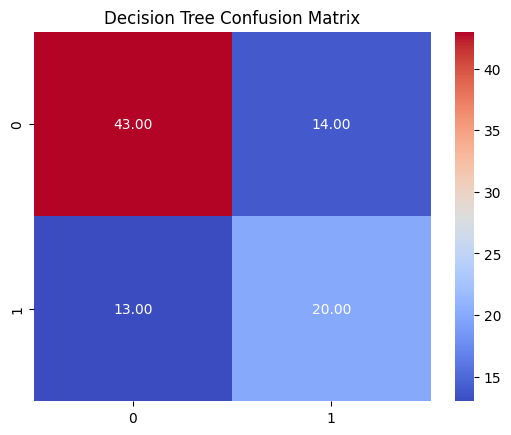

In [77]:
con_tree = confusion_matrix(ytest,y_pred_tree)
sns.heatmap(con_tree,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### random forest model

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain_scaled, ytrain)
y_pred_rf = rf_model.predict(xtest_scaled)

In [84]:
rf_model.score(xtrain_scaled, ytrain)

1.0

In [86]:
print("\nRandom Forest Model Performance:") 
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n') 
print("Classification Report:") 
print(classification_report(ytest, y_pred_rf)) 


Random Forest Model Performance:
Accuracy: 0.8333333333333334 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        57
           1       0.85      0.67      0.75        33

    accuracy                           0.83        90
   macro avg       0.84      0.80      0.81        90
weighted avg       0.83      0.83      0.83        90



# Comparing best model with other model
### Logistic Regression: 
- Accuracy score: training score- 84% and testing score-80%,
- precision score: 85%,
- F1 score: 66%,
-  recall score: 54%
### KNN Classification:
- accuracy score: training score- 74% and testing score-66%,
- precision score: 100%
- F1 score: 16%, 
- recall score: 9%
### Decision Tree Classification:
- accuracy score: training score- 100% and testing score-68%, 
- precision score: 57%,
- F1 score: 57%,
- recall score: 57%

### Random forest model:
-  accuracy score: training score- 100% and testing score-83%, 
- precision score: 84%,
- F1 score: 81%,
- recall score: 80%

### Best performed Model: 
- Random forest where accuracy is 83%

# Ploting ROC Curve

In [90]:
from sklearn.metrics import RocCurveDisplay

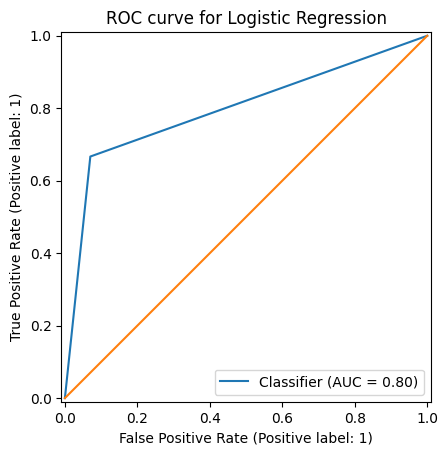

In [92]:
# for Random Forest
RocCurveDisplay.from_predictions(ytest,y_pred_rf)
plt.plot([0,1],[0,1])
plt.title('ROC curve for Logistic Regression')
plt.show()

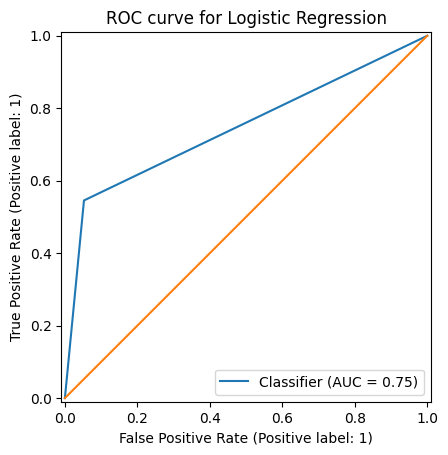

In [94]:
# for Logistic Regression
RocCurveDisplay.from_predictions(ytest,y_pred_logi)
plt.plot([0,1],[0,1])
plt.title('ROC curve for Logistic Regression')
plt.show()

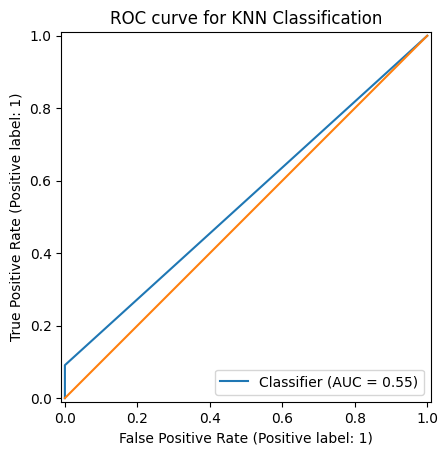

In [95]:
#for KNN Classification
RocCurveDisplay.from_predictions(ytest,y_pred_knn)
plt.plot([0,1],[0,1])
plt.title('ROC curve for KNN Classification')
plt.show()

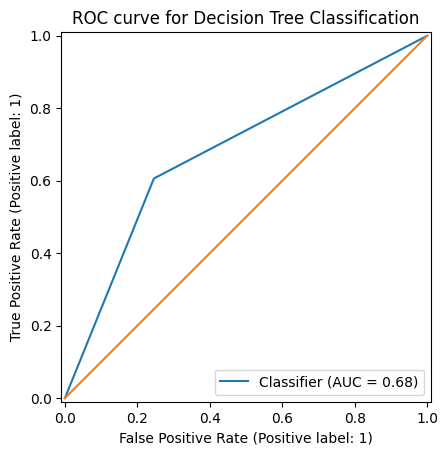

In [96]:
#for Decision Tree Classification
RocCurveDisplay.from_predictions(ytest,y_pred_tree)
plt.plot([0,1],[0,1])
plt.title('ROC curve for Decision Tree Classification')
plt.show()

### Random forest model:
-  accuracy score: training score- 100% and testing score-83%, 
- precision score: 84%,
- F1 score: 81%,
- recall score: 80%

### Best performed Model: 
- Random forest where accuracy is 83%